In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy
pd.set_option('display.max_columns', None)

In [2]:
wdbc = pd.read_csv("wdbc.csv",header = None)
features = wdbc.loc[:,1:]
features.columns = ['Label'] + [str(i) for i in range(1, len(features.columns))]

In [3]:
features

Label      1      2       3       4        5        6        7        8  \
0       M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710   
1       M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
2       M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
3       M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
4       M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
..    ...    ...    ...     ...     ...      ...      ...      ...      ...   
564     M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
565     M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
566     M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
567     M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
568     B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000   

          9       10      11      12     13      14        15       16  \
0    0.2419  0.07871  1.0950  0.9053  8.589  153.40  0.006399  0.04904   
1    0.1812  0.05667  0.5435  0.7339  3.398   74.08  0.005225  0.01308   
2    0.2069  0.05999  0.7456  0.7869  4.585   94.03  0.006150  0.04006   
3    0.2597  0.09744  0.4956  1.1560  3.445   27.23  0.009110  0.07458   
4    0.1809  0.05883  0.7572  0.7813  5.438   94.44  0.011490  0.02461   
..      ...      ...     ...     ...    ...     ...       ...      ...   
564  0.1726  0.05623  1.1760  1.2560  7.673  158.70  0.010300  0.02891   
565  0.1752  0.05533  0.7655  2.4630  5.203   99.04  0.005769  0.02423   
566  0.1590  0.05648  0.4564  1.0750  3.425   48.55  0.005903  0.03731   
567  0.2397  0.07016  0.7260  1.5950  5.772   86.22  0.006522  0.06158   
568  0.1587  0.05884  0.3857  1.4280  2.548   19.15  0.007189  0.00466   

          17       18       19        20      21     22      23      24  \
0    0.05373  0.01587  0.03003  0.006193  25.380  17.33  184.60  2019.0   
1    0.01860  0.01340  0.01389  0.003532  24.990  23.41  158.80  1956.0   
2    0.03832  0.02058  0.02250  0.004571  23.570  25.53  152.50  1709.0   
3    0.05661  0.01867  0.05963  0.009208  14.910  26.50   98.87   567.7   
4    0.05688  0.01885  0.01756  0.005115  22.540  16.67  152.20  1575.0   
..       ...      ...      ...       ...     ...    ...     ...     ...   
564  0.05198  0.02454  0.01114  0.004239  25.450  26.40  166.10  2027.0   
565  0.03950  0.01678  0.01898  0.002498  23.690  38.25  155.00  1731.0   
566  0.04730  0.01557  0.01318  0.003892  18.980  34.12  126.70  1124.0   
567  0.07117  0.01664  0.02324  0.006185  25.740  39.42  184.60  1821.0   
568  0.00000  0.00000  0.02676  0.002783   9.456  30.37   59.16   268.6   

          25       26      27      28      29       30  
0    0.16220  0.66560  0.7119  0.2654  0.4601  0.11890  
1    0.12380  0.18660  0.2416  0.1860  0.2750  0.08902  
2    0.14440  0.42450  0.4504  0.2430  0.3613  0.08758  
3    0.20980  0.86630  0.6869  0.2575  0.6638  0.17300  
4    0.13740  0.20500  0.4000  0.1625  0.2364  0.07678  
..       ...      ...     ...     ...     ...      ...  
564  0.14100  0.21130  0.4107  0.2216  0.2060  0.07115  
565  0.11660  0.19220  0.3215  0.1628  0.2572  0.06637  
566  0.11390  0.30940  0.3403  0.1418  0.2218  0.07820  
567  0.16500  0.86810  0.9387  0.2650  0.4087  0.12400  
568  0.08996  0.06444  0.0000  0.0000  0.2871  0.07039  

[569 rows x 31 columns]

In [4]:
for column in features.columns[1:]:
    min_x = min(features.loc[:, column])
    max_x = max(features.loc[:, column])
    column_name = str(column) + "_norm"
    features[column_name] = (features[column] - min_x) / (max_x - min_x)

In [5]:
features

Label      1      2       3       4        5        6        7        8  \
0       M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710   
1       M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017   
2       M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790   
3       M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520   
4       M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430   
..    ...    ...    ...     ...     ...      ...      ...      ...      ...   
564     M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890   
565     M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791   
566     M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302   
567     M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200   
568     B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000   

          9       10      11      12     13      14        15       16  \
0    0.2419  0.07871  1.0950  0.9053  8.589  153.40  0.006399  0.04904   
1    0.1812  0.05667  0.5435  0.7339  3.398   74.08  0.005225  0.01308   
2    0.2069  0.05999  0.7456  0.7869  4.585   94.03  0.006150  0.04006   
3    0.2597  0.09744  0.4956  1.1560  3.445   27.23  0.009110  0.07458   
4    0.1809  0.05883  0.7572  0.7813  5.438   94.44  0.011490  0.02461   
..      ...      ...     ...     ...    ...     ...       ...      ...   
564  0.1726  0.05623  1.1760  1.2560  7.673  158.70  0.010300  0.02891   
565  0.1752  0.05533  0.7655  2.4630  5.203   99.04  0.005769  0.02423   
566  0.1590  0.05648  0.4564  1.0750  3.425   48.55  0.005903  0.03731   
567  0.2397  0.07016  0.7260  1.5950  5.772   86.22  0.006522  0.06158   
568  0.1587  0.05884  0.3857  1.4280  2.548   19.15  0.007189  0.00466   

          17       18       19        20      21     22      23      24  \
0    0.05373  0.01587  0.03003  0.006193  25.380  17.33  184.60  2019.0   
1    0.01860  0.01340  0.01389  0.003532  24.990  23.41  158.80  1956.0   
2    0.03832  0.02058  0.02250  0.004571  23.570  25.53  152.50  1709.0   
3    0.05661  0.01867  0.05963  0.009208  14.910  26.50   98.87   567.7   
4    0.05688  0.01885  0.01756  0.005115  22.540  16.67  152.20  1575.0   
..       ...      ...      ...       ...     ...    ...     ...     ...   
564  0.05198  0.02454  0.01114  0.004239  25.450  26.40  166.10  2027.0   
565  0.03950  0.01678  0.01898  0.002498  23.690  38.25  155.00  1731.0   
566  0.04730  0.01557  0.01318  0.003892  18.980  34.12  126.70  1124.0   
567  0.07117  0.01664  0.02324  0.006185  25.740  39.42  184.60  1821.0   
568  0.00000  0.00000  0.02676  0.002783   9.456  30.37   59.16   268.6   

          25       26      27      28      29       30    1_norm    2_norm  \
0    0.16220  0.66560  0.7119  0.2654  0.4601  0.11890  0.521037  0.022658   
1    0.12380  0.18660  0.2416  0.1860  0.2750  0.08902  0.643144  0.272574   
2    0.14440  0.42450  0.4504  0.2430  0.3613  0.08758  0.601496  0.390260   
3    0.20980  0.86630  0.6869  0.2575  0.6638  0.17300  0.210090  0.360839   
4    0.13740  0.20500  0.4000  0.1625  0.2364  0.07678  0.629893  0.156578   
..       ...      ...     ...     ...     ...      ...       ...       ...   
564  0.14100  0.21130  0.4107  0.2216  0.2060  0.07115  0.690000  0.428813   
565  0.11660  0.19220  0.3215  0.1628  0.2572  0.06637  0.622320  0.626987   
566  0.11390  0.30940  0.3403  0.1418  0.2218  0.07820  0.455251  0.621238   
567  0.16500  0.86810  0.9387  0.2650  0.4087  0.12400  0.644564  0.663510   
568  0.08996  0.06444  0.0000  0.0000  0.2871  0.07039  0.036869  0.501522   

       3_norm    4_norm    5_norm    6_norm    7_norm    8_norm    9_norm  \
0    0.545989  0.363733  0.593753  0.792037  0.703140  0.731113  0.686364   
1    0.615783  0.501591  0.289880  0.181768  0.203608  0.348757  0.379798   
2    0.595743  0.449417  0.514309  0.431017  0.462512  0.635686  0.509596   
3    0.233501  0.102

In [6]:
normalized_features = features.iloc[:, 31:]
normalized_features.insert(loc = 0, column = "Label", value = features["Label"])
normalized_features

Label    1_norm    2_norm    3_norm    4_norm    5_norm    6_norm  \
0       M  0.521037  0.022658  0.545989  0.363733  0.593753  0.792037   
1       M  0.643144  0.272574  0.615783  0.501591  0.289880  0.181768   
2       M  0.601496  0.390260  0.595743  0.449417  0.514309  0.431017   
3       M  0.210090  0.360839  0.233501  0.102906  0.811321  0.811361   
4       M  0.629893  0.156578  0.630986  0.489290  0.430351  0.347893   
..    ...       ...       ...       ...       ...       ...       ...   
564     M  0.690000  0.428813  0.678668  0.566490  0.526948  0.296055   
565     M  0.622320  0.626987  0.604036  0.474019  0.407782  0.257714   
566     M  0.455251  0.621238  0.445788  0.303118  0.288165  0.254340   
567     M  0.644564  0.663510  0.665538  0.475716  0.588336  0.790197   
568     B  0.036869  0.501522  0.028540  0.015907  0.000000  0.074351   

       7_norm    8_norm    9_norm   10_norm   11_norm   12_norm   13_norm  \
0    0.703140  0.731113  0.686364  0.605518  0.356147  0.120469  0.369034   
1    0.203608  0.348757  0.379798  0.141323  0.156437  0.082589  0.124440   
2    0.462512  0.635686  0.509596  0.211247  0.229622  0.094303  0.180370   
3    0.565604  0.522863  0.776263  1.000000  0.139091  0.175875  0.126655   
4    0.463918  0.518390  0.378283  0.186816  0.233822  0.093065  0.220563   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.571462  0.690358  0.336364  0.132056  0.385479  0.197976  0.325873   
565  0.337395  0.486630  0.349495  0.113100  0.236828  0.464728  0.209490   
566  0.216753  0.263519  0.267677  0.137321  0.124896  0.157974  0.125713   
567  0.823336  0.755467  0.675253  0.425442  0.222524  0.272896  0.236300   
568  0.000000  0.000000  0.266162  0.187026  0.099294  0.235988  0.084390   

      14_norm   15_norm   16_norm   17_norm   18_norm   19_norm   20_norm  \
0    0.273811  0.159296  0.351398  0.135682  0.300625  0.311645  0.183042   
1    0.125660  0.119387  0.081323  0.046970  0.253836  0.084539  0.091110   
2    0.162922  0.150831  0.283955  0.096768  0.389847  0.205690  0.127006   
3    0.038155  0.251453  0.543215  0.142955  0.353665  0.728148  0.287205   
4    0.163688  0.332359  0.167918  0.143636  0.357075  0.136179  0.145800   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.283710  0.291906  0.200213  0.131263  0.464861  0.045843  0.115536   
565  0.172279  0.137879  0.165064  0.099747  0.317863  0.156160  0.055387   
566  0.077976  0.142435  0.263301  0.119444  0.294942  0.074548  0.103547   
567  0.148335  0.163477  0.445579  0.179722  0.315211  0.216103  0.182766   
568  0.023063  0.186151  0.018085  0.000000  0.000000  0.265633  0.065234   

      21_norm   22_norm   23_norm   24_norm   25_norm   26_norm   27_norm  \
0    0.620776  0.141525  0.668310  0.450698  0.601136  0.619292  0.568610   
1    0.606901  0.303571  0.539818  0.435214  0.347553  0.154563  0.192971   
2    0.556386  0.360075  0.508442  0.374508  0.483590  0.385375  0.359744   
3    0.248310  0.385928  0.241347  0.094008  0.915472  0.814012  0.548642   
4    0.519744  0.123934  0.506948  0.341575  0.437364  0.172415  0.319489   
..        ...       ...       ...       ...       ...       ...       ...   
564  0.623266  0.383262  0.576174  0.452664  0.461137  0.178527  0.328035   
565  0.560655  0.699094  0.520892  0.379915  0.300007  0.159997  0.256789   
566  0.393099  0.589019  0.379949  0.230731  0.282177  0.273705  0.271805   
567  0.633582  0.730277  0.668310  0.402035  0.619626  0.815758  0.749760   
568  0.054287  0.489072  0.043578  0.020497  0.124084  0.036043  0.000000   

      28_norm   29_norm   30_norm  
0    0.912027  0.598462  0.418864  
1    0.639175  0.233590  0.222878  
2    0.835052  0.403706  0.213433  
3    0.884880  1.000000  0.773711  
4    0.558419  0.157500  0.142595  
..        ...       ...       ...  
564  0.761512  0.097575  0.105667  
565  0.559450  0.198502  0.074315  
566  0.487285  0.128721  0.1

<b>Overlapping Histograms</b>

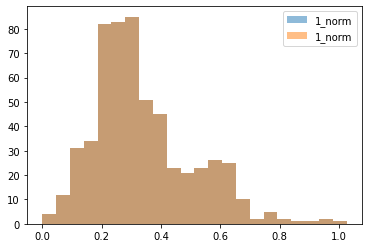

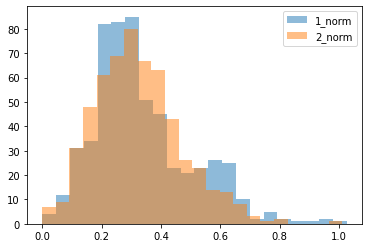

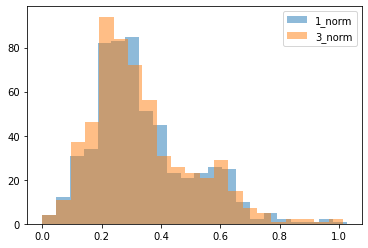

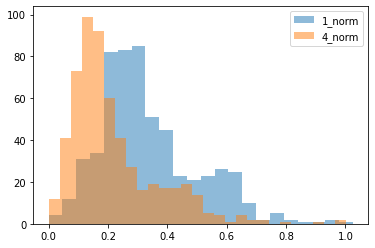

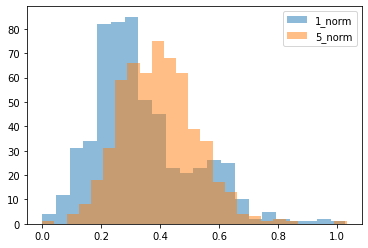

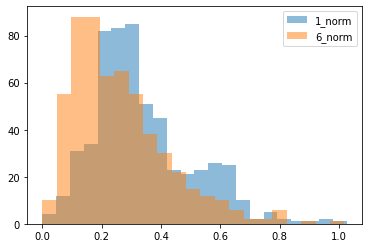

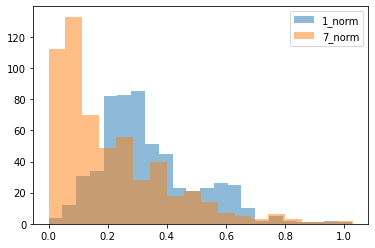

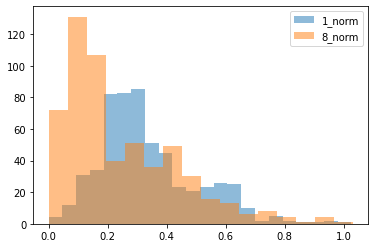

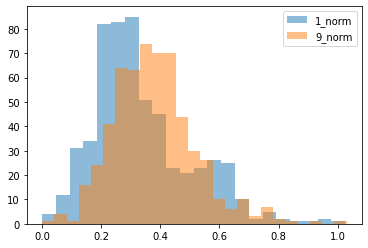

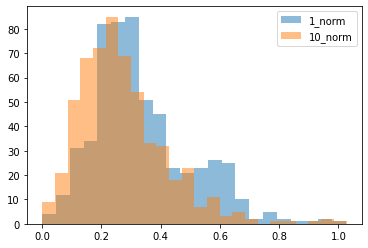

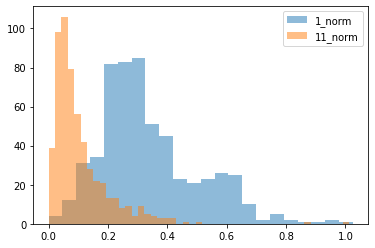

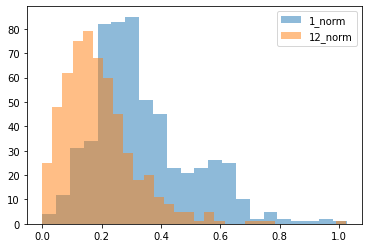

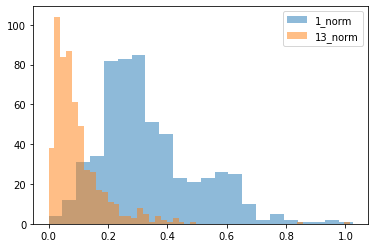

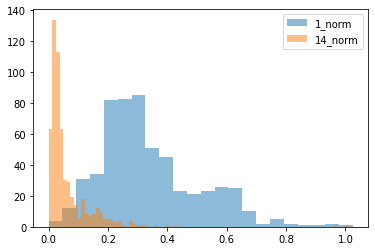

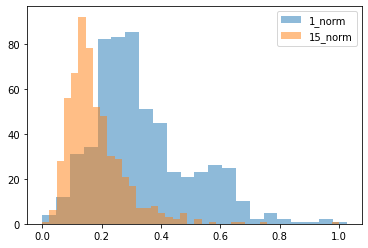

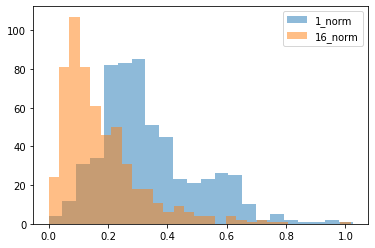

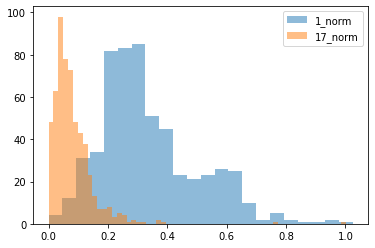

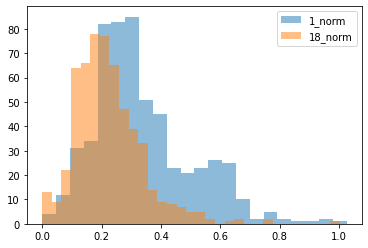

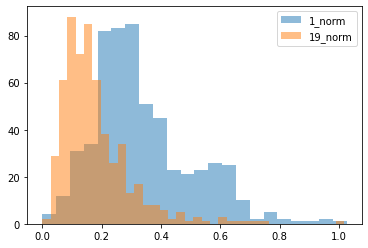

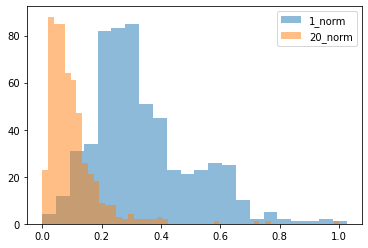

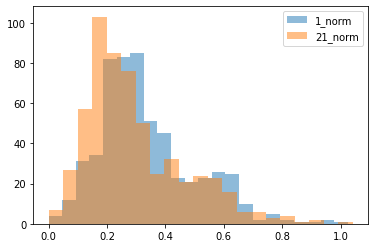

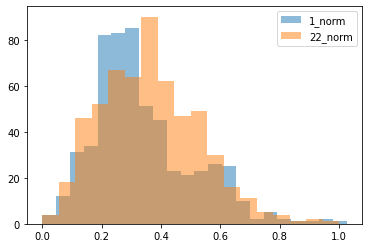

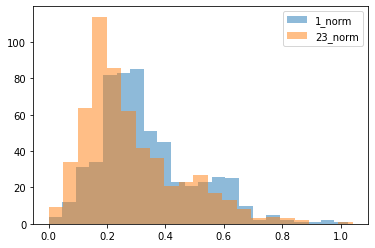

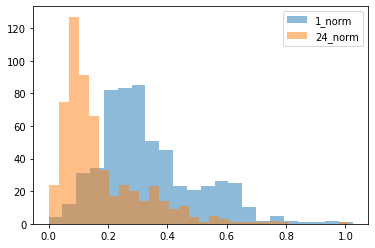

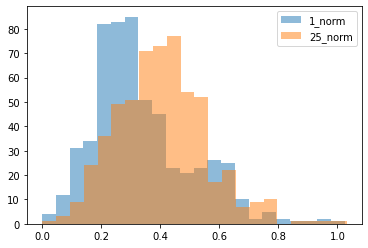

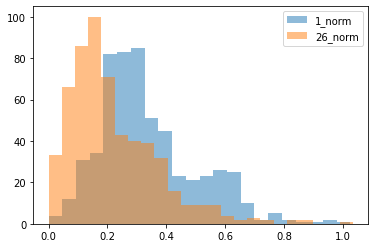

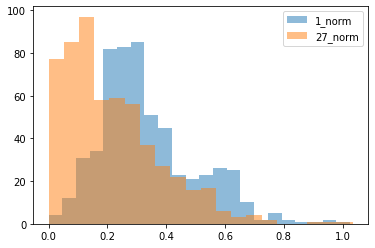

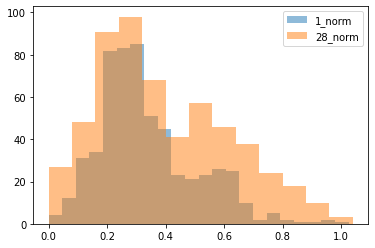

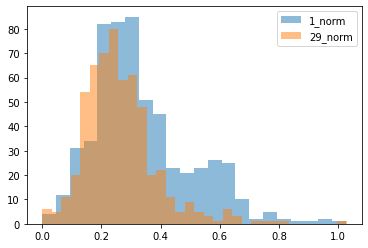

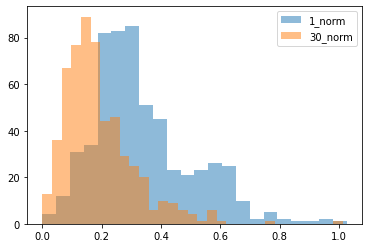

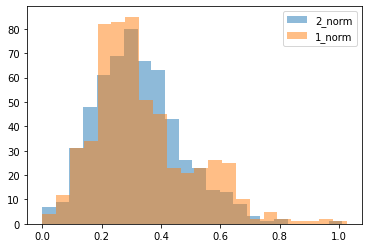

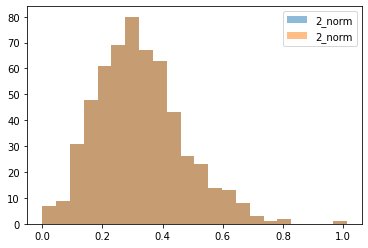

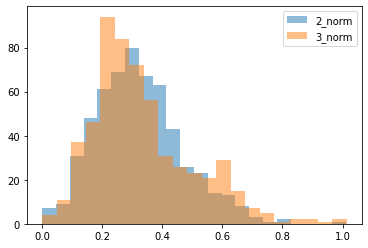

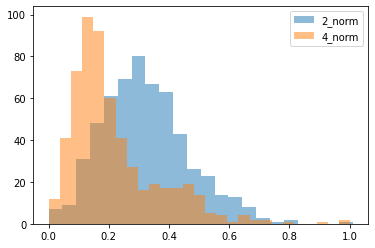

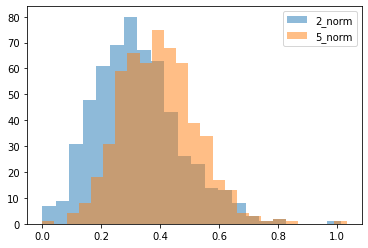

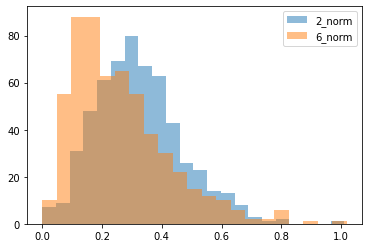

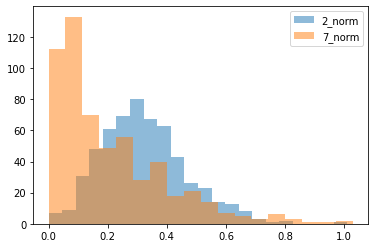

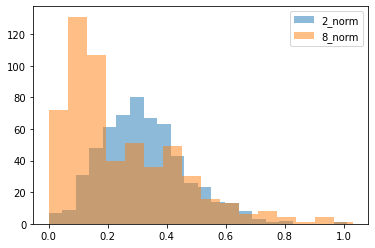

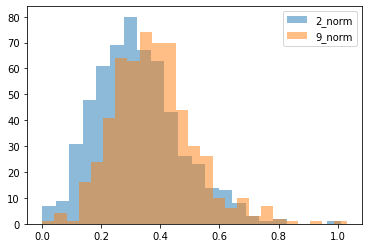

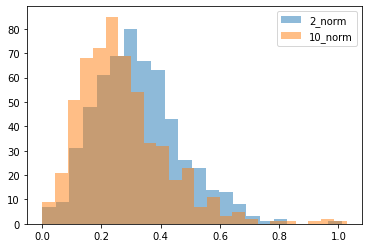

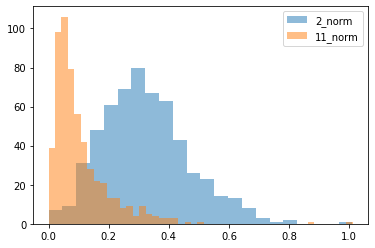

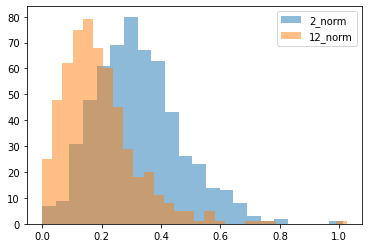

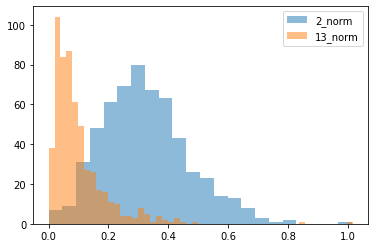

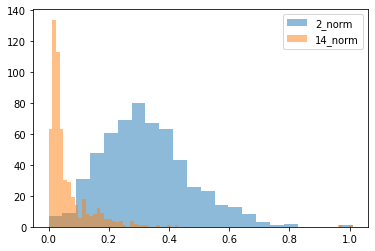

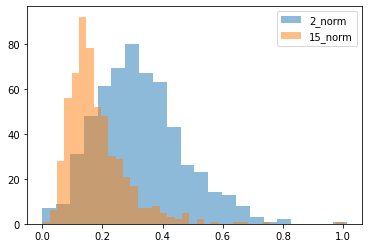

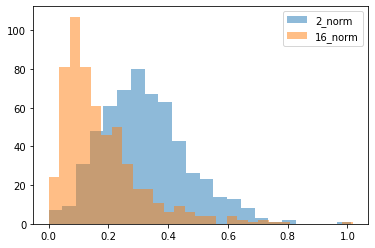

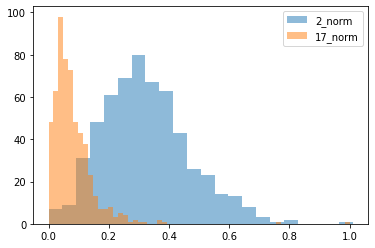

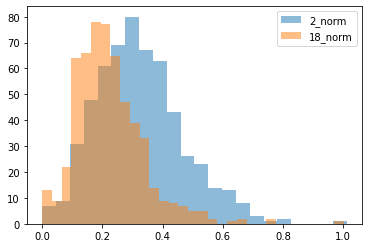

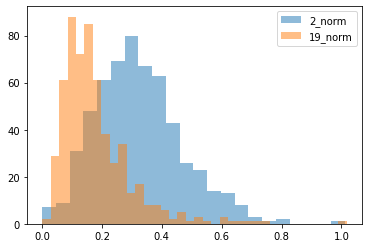

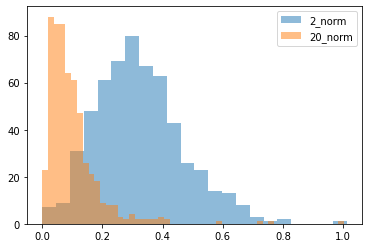

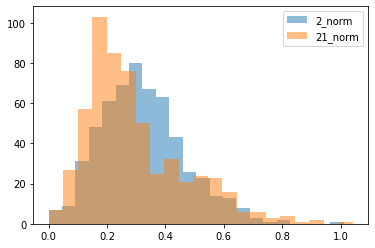

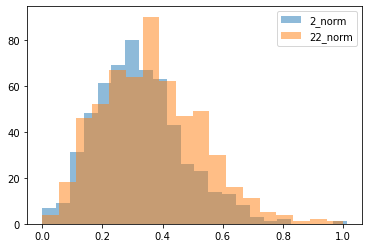

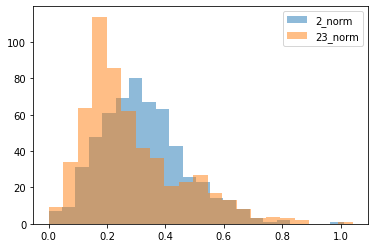

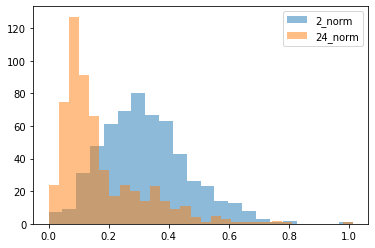

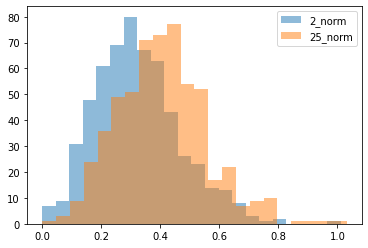

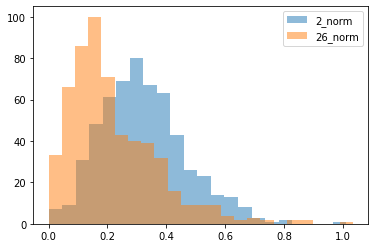

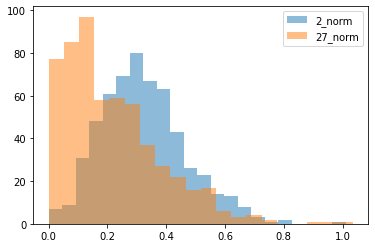

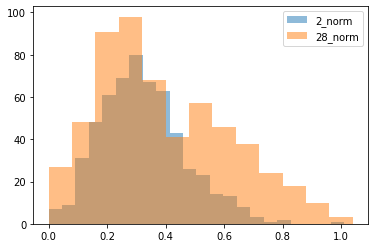

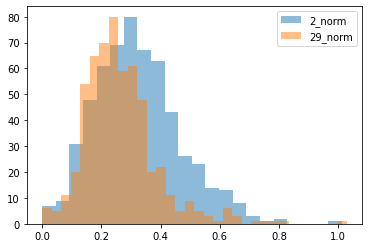

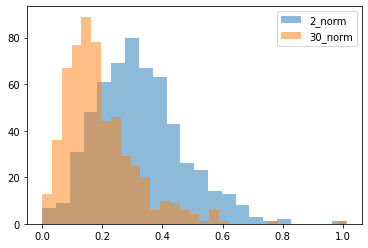

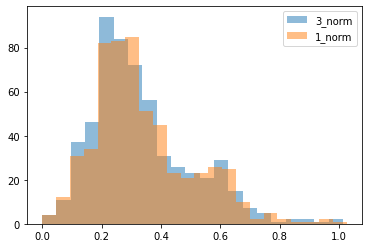

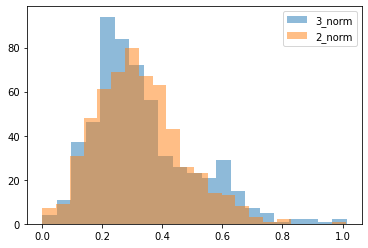

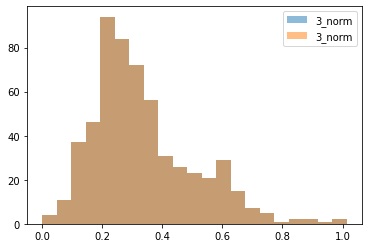

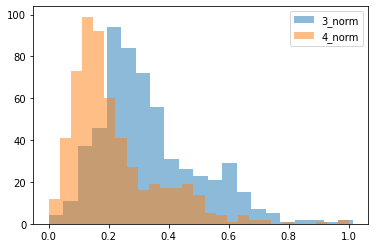

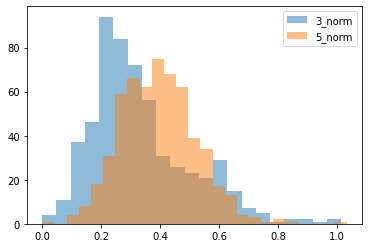

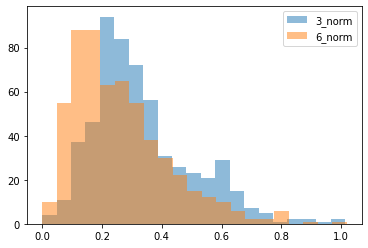

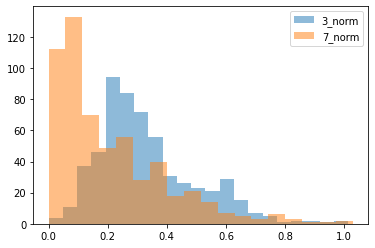

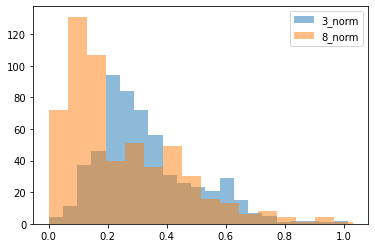

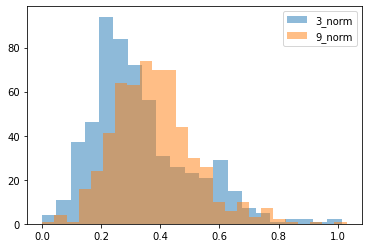

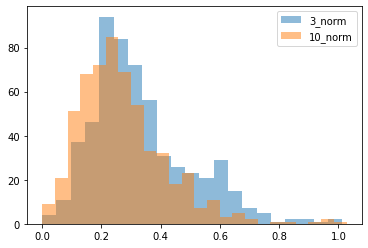

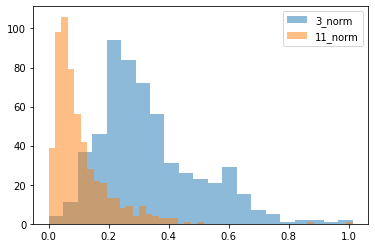

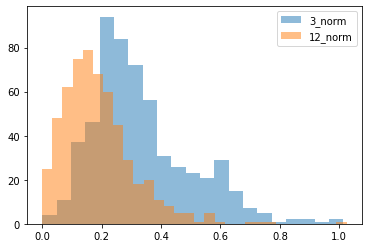

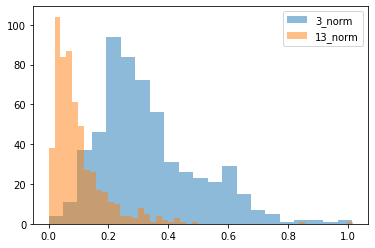

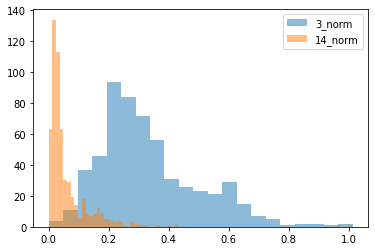

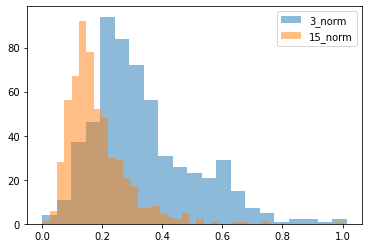

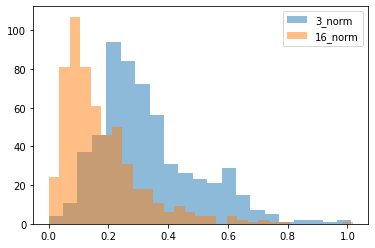

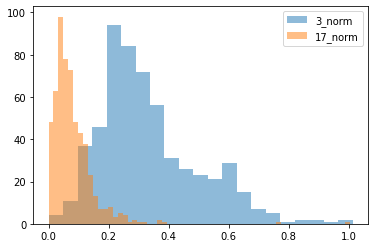

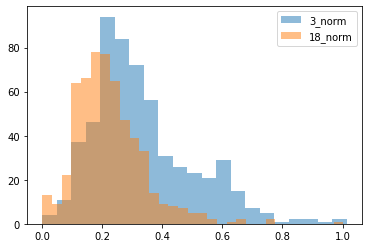

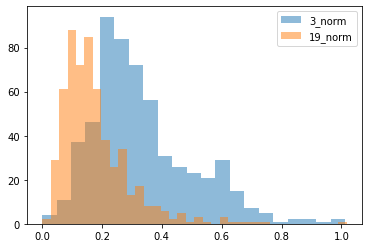

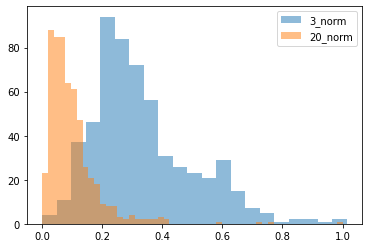

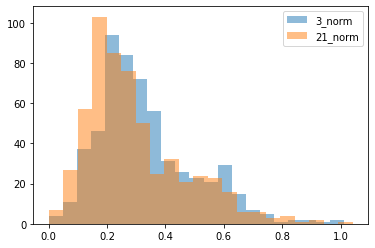

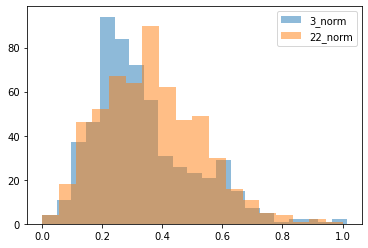

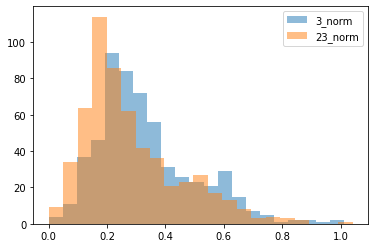

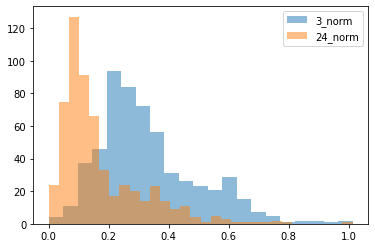

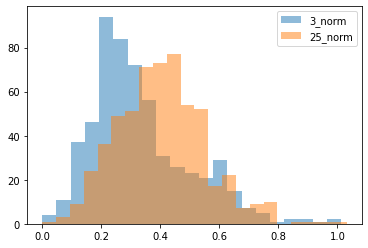

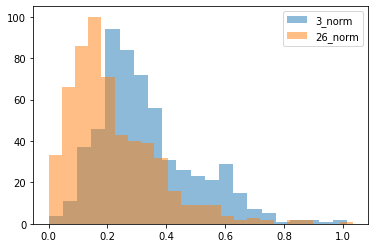

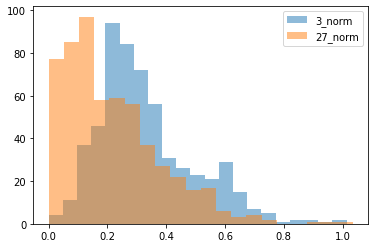

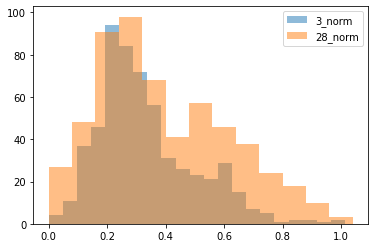

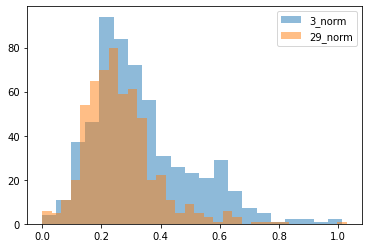

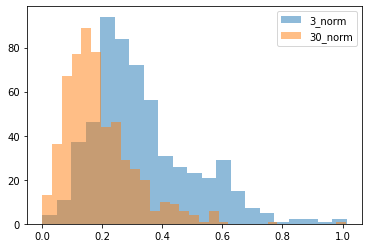

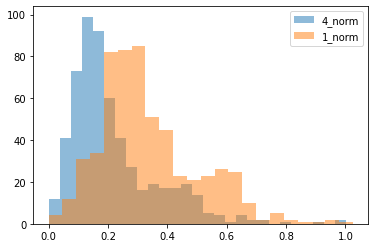

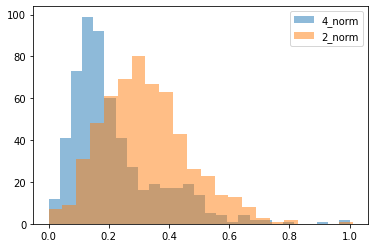

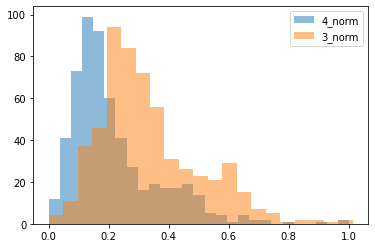

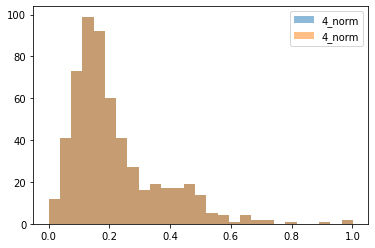

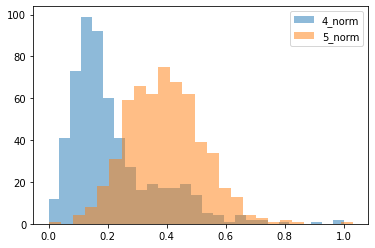

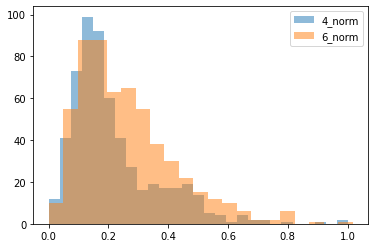

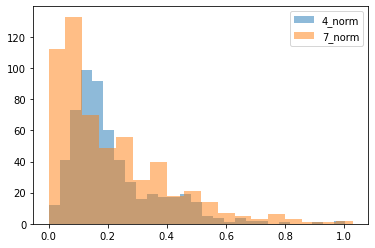

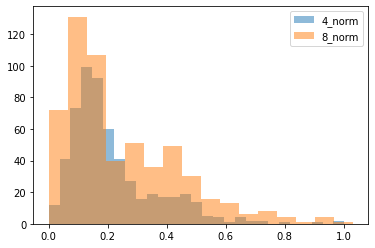

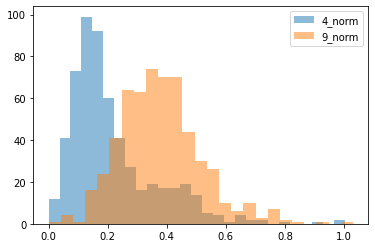

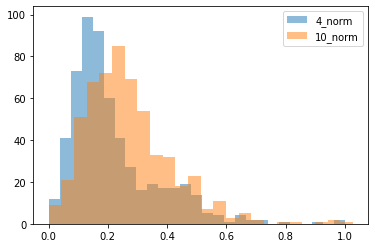

KeyboardInterrupt: 

In [7]:
import numpy as np

def binwidth(data):
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    n = len(data)
    bin_width = (2*iqr)/n**(1/3) ## The Freedman - Diaconis Rule is rounded by default math rounding rules
    return bin_width

for x in range(1, 31):
    for y in range(1,31):
        str_a = f'{x}_norm'
        a = normalized_features[str_a]
        str_b = f'{y}_norm'
        b = normalized_features[str_b]
        plt.hist(a, alpha = 0.5, bins=np.arange(min(a), max(a) + binwidth(a), binwidth(a)), label = str_a)
        plt.hist(b, alpha = 0.5, bins=np.arange(min(b), max(b) + binwidth(b), binwidth(b)), label = str_b)
        plt.legend(loc = "upper right")
        plt.show()

         1    1_norm
0    17.99  0.521037
1    20.57  0.643144
2    19.69  0.601496
3    11.42  0.210090
4    20.29  0.629893
..     ...       ...
564  21.56  0.690000
565  20.13  0.622320
566  16.60  0.455251
567  20.60  0.644564
568   7.76  0.036869

[569 rows x 2 columns]


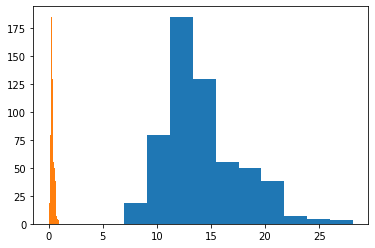

In [7]:
print(features.iloc[:,[1,31]])
'''
#iqr = scipy.stats.iqr(features['Features'])
#n = len(features['x_normalized'])
#bin_width = round(2*iqr/(n**(1/3)))  ## The Freedman - Diaconis Rule is rounded by default math rounding rules
'''
plt.hist(features['1'])
plt.hist(features['1_norm'])
plt.show()

<b>Scatterplot Matrix</b>

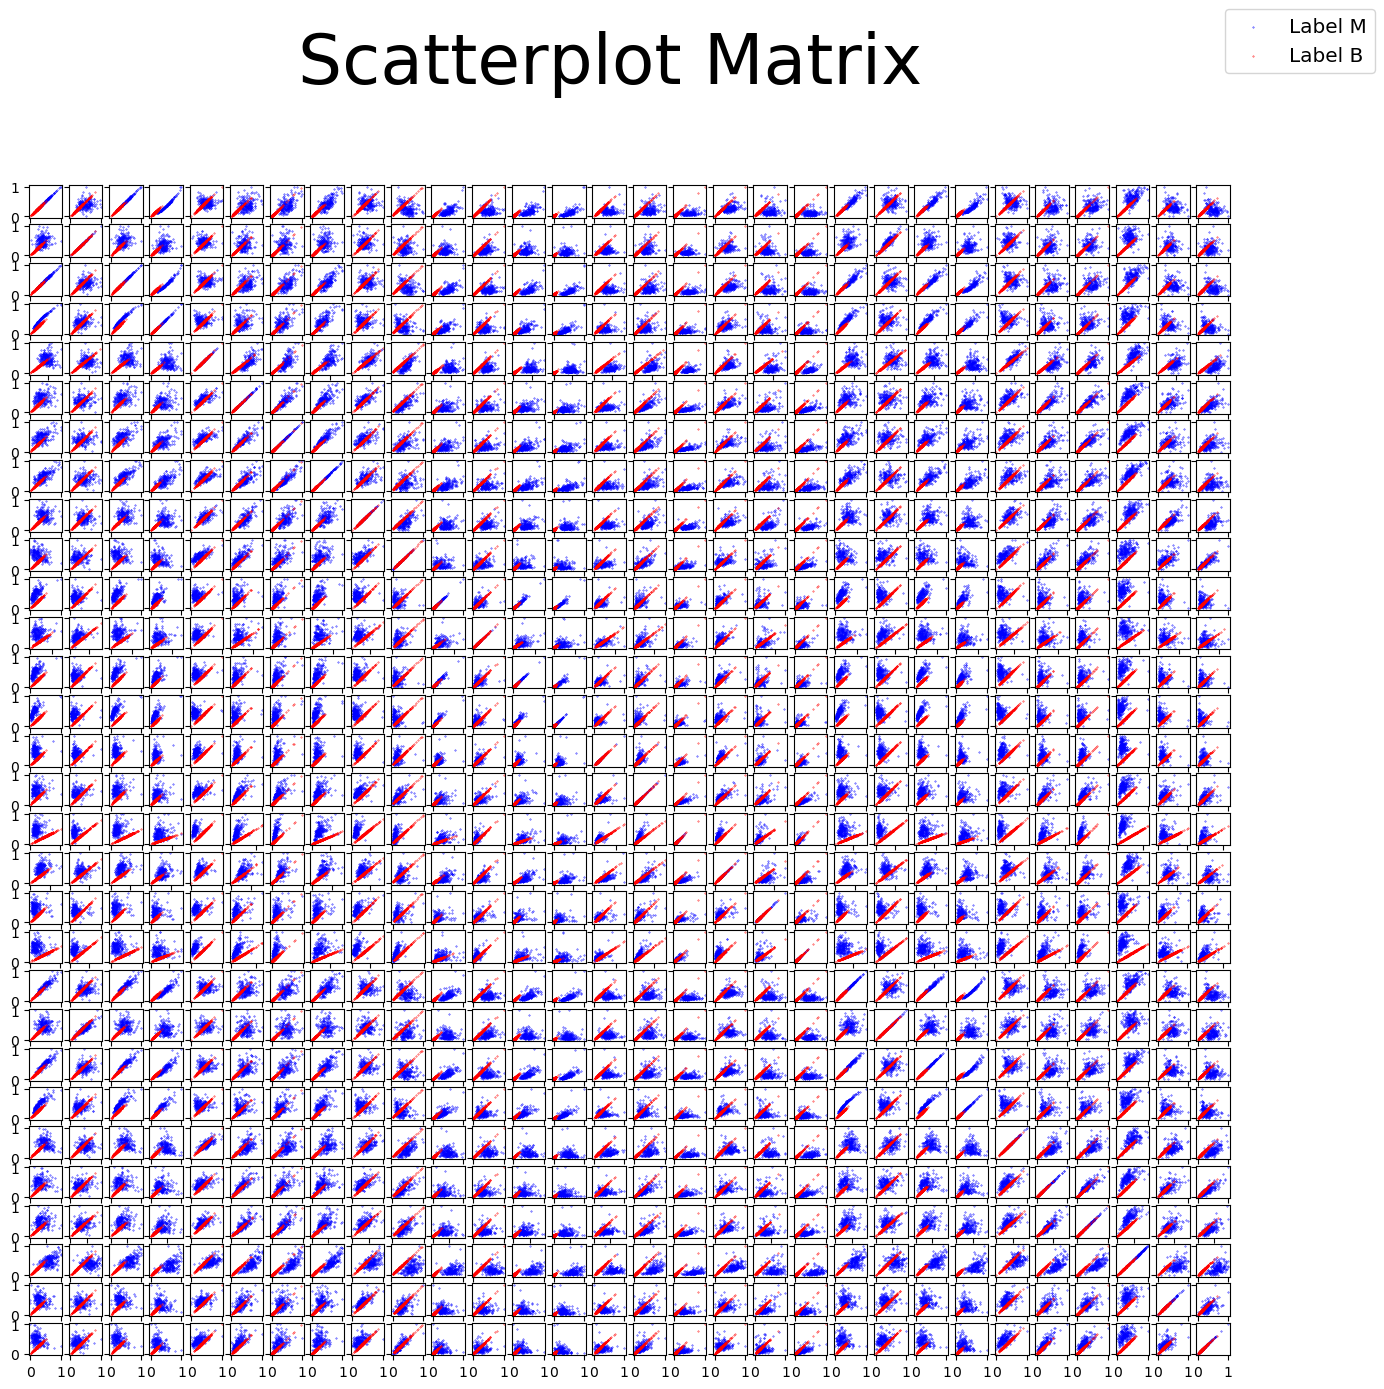

In [12]:
fig, axs = plt.subplots(30,30)
fig.suptitle('Scatterplot Matrix', fontsize = 50)
for x in range(30):
    for y in range(30):
        LabelM = normalized_features.loc[normalized_features["Label"] == "M"]
        LabelB = normalized_features.loc[normalized_features["Label"] == "B"]
        LabelM_a = LabelM.iloc[:, x+1]
        LabelM_b = LabelM.iloc[:, y+1]
        LabelB_a = LabelB.iloc[:, y+1]
        LabelB_b = LabelB.iloc[:, y+1]
        axs[x,y].scatter(x = LabelM_a, y = LabelM_b, s = 0.1, color = "blue", label = "Label M")
        axs[x,y].scatter(x = LabelB_a, y = LabelB_b, s = 0.1, color = "red", label = "Label B")
for ax in fig.get_axes():
    ax.label_outer()
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize = "x-large")
fig.set_size_inches(15.5, 15.5)
fig.set_dpi(100)
plt.savefig("image.png")
plt.show()

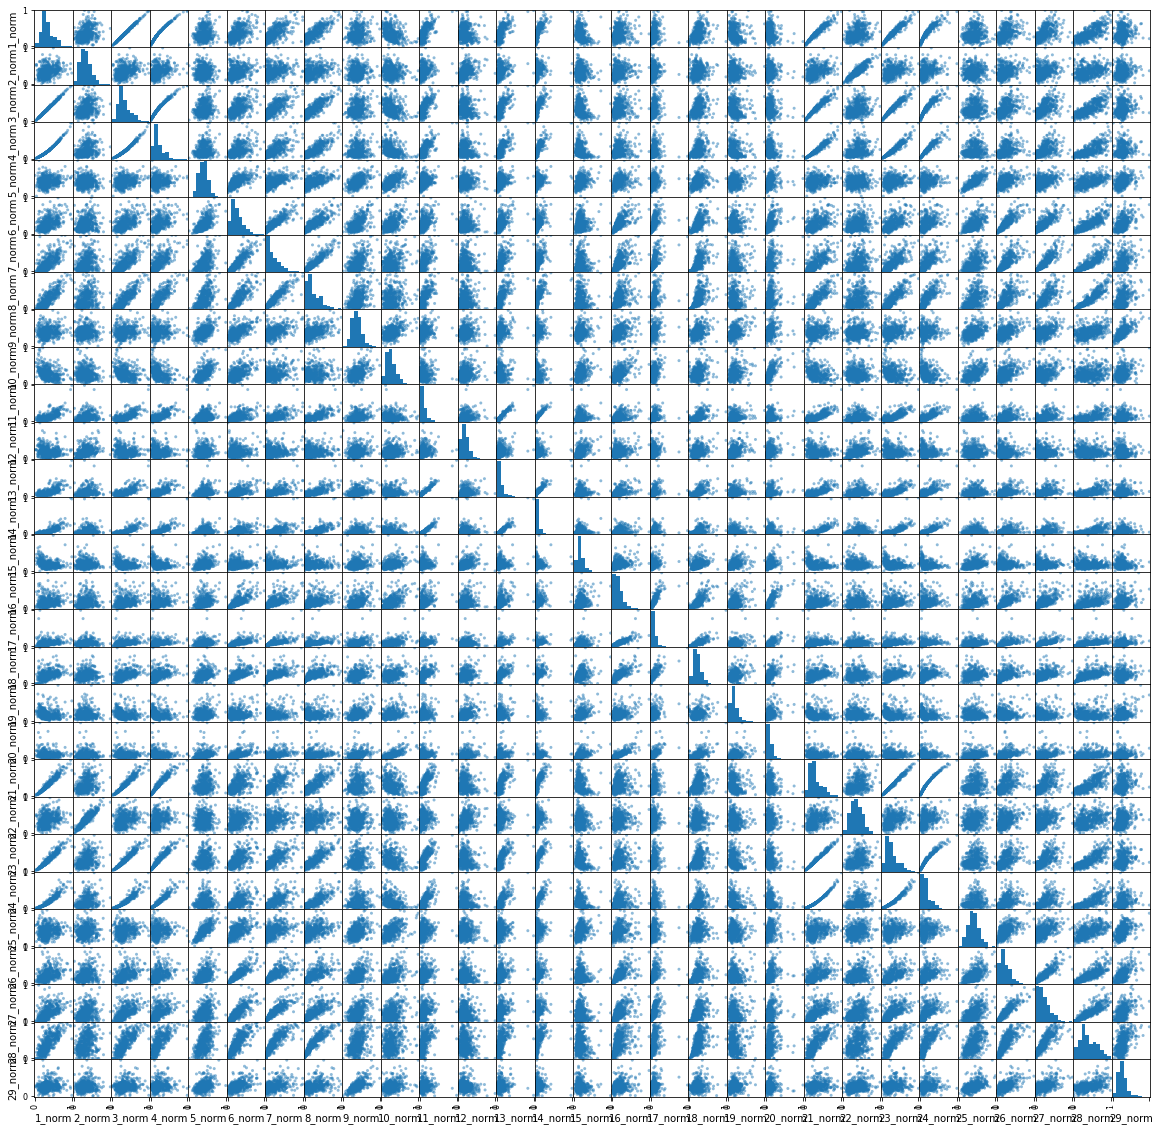

<Figure size 1440x1440 with 0 Axes>

In [42]:
'''
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [20, 20]
scatter = scatter_matrix(normalized_features.iloc[:, 1:30])
plt.xticks(color='w')
plt.savefig("image.png")
plt.figure(figsize=(20,20))
plt.show()
'''

In [52]:
normalized_features.corr()

1_norm    2_norm    3_norm    4_norm    5_norm    6_norm    7_norm  \
1_norm   1.000000  0.323782  0.997855  0.987357  0.170581  0.506124  0.676764   
2_norm   0.323782  1.000000  0.329533  0.321086 -0.023389  0.236702  0.302418   
3_norm   0.997855  0.329533  1.000000  0.986507  0.207278  0.556936  0.716136   
4_norm   0.987357  0.321086  0.986507  1.000000  0.177028  0.498502  0.685983   
5_norm   0.170581 -0.023389  0.207278  0.177028  1.000000  0.659123  0.521984   
6_norm   0.506124  0.236702  0.556936  0.498502  0.659123  1.000000  0.883121   
7_norm   0.676764  0.302418  0.716136  0.685983  0.521984  0.883121  1.000000   
8_norm   0.822529  0.293464  0.850977  0.823269  0.553695  0.831135  0.921391   
9_norm   0.147741  0.071401  0.183027  0.151293  0.557775  0.602641  0.500667   
10_norm -0.311631 -0.076437 -0.261477 -0.283110  0.584792  0.565369  0.336783   
11_norm  0.679090  0.275869  0.691765  0.732562  0.301467  0.497473  0.631925   
12_norm -0.097317  0.386358 -0.086761 -0.066280  0.068406  0.046205  0.076218   
13_norm  0.674172  0.281673  0.693135  0.726628  0.296092  0.548905  0.660391   
14_norm  0.735864  0.259845  0.744983  0.800086  0.246552  0.455653  0.617427   
15_norm -0.222600  0.006614 -0.202694 -0.166777  0.332375  0.135299  0.098564   
16_norm  0.206000  0.191975  0.250744  0.212583  0.318943  0.738722  0.670279   
17_norm  0.194204  0.143293  0.228082  0.207660  0.248396  0.570517  0.691270   
18_norm  0.376169  0.163851  0.407217  0.372320  0.380676  0.642262  0.683260   
19_norm -0.104321  0.009127 -0.081629 -0.072497  0.200774  0.229977  0.178009   
20_norm -0.042641  0.054458 -0.005523 -0.019887  0.283607  0.507318  0.449301   
21_norm  0.969539  0.352573  0.969476  0.962746  0.213120  0.535315  0.688236   
22_norm  0.297008  0.912045  0.303038  0.287489  0.036072  0.248133  0.299879   
23_norm  0.965137  0.358040  0.970387  0.959120  0.238853  0.590210  0.729565   
24_norm  0.941082  0.343546  0.941550  0.959213  0.206718  0.509604  0.675987   
25_norm  0.119616  0.077503  0.150549  0.123523  0.805324  0.565541  0.448822   
26_norm  0.413463  0.277830  0.455774  0.390410  0.472468  0.865809  0.754968   
27_norm  0.526911  0.301025  0.563879  0.512606  0.434926  0.816275  0.884103   
28_norm  0.744214  0.295316  0.771241  0.722017  0.503053  0.815573  0.861323   
29_norm  0.163953  0.105008  0.189115  0.143570  0.394309  0.510223  0.409464   
30_norm  0.007066  0.119205  0.051019  0.003738  0.499316  0.687382  0.514930   

           8_norm    9_norm   10_norm   11_norm   12_norm   13_norm   14_norm  \
1_norm   0.822529  0.147741 -0.311631  0.679090 -0.097317  0.674172  0.735864   
2_norm   0.293464  0.071401 -0.076437  0.275869  0.386358  0.281673  0.259845   
3_norm   0.850977  0.183027 -0.261477  0.691765 -0.086761  0.693135  0.744983   
4_norm   0.823269  0.151293 -0.283110  0.732562 -0.066280  0.726628  0.800086   
5_norm   0.553695  0.557775  0.584792  0.301467  0.068406  0.296092  0.246552   
6_norm   0.831135  0.602641  0.565369  0.497473  0.046205  0.548905  0.455653   
7_norm   0.921391  0.500667  0.336783  0.631925  0.076218  0.660391  0.617427   
8_norm   1.000000  0.462497  0.166917  0.698050  0.021480  0.710650  0.690299   
9_norm   0.462497  1.000000  0.479921  0.303379  0.128053  0.313893  0.223970   
10_norm  0.166917  0.479921  1.000000  0.000111  0.164174  0.039830 -0.090170   
11_norm  0.698050  0.303379  0.000111  1.000000  0.213247  0.972794  0.951830   
12_norm  0.021480  0.128053  0.164174  0.213247  1.000000  0.223171  0.111567   
13_norm  0.710650  0.313893  0.039830  0.972794  0.223171  1.000000  0.937655   
14_norm  0.690299  0.223970 -0.090170  0.951830  0.111567  0.937655  1.000000   
15_norm  0.027653  0.187321  0.401964  0.164514  0.397243  0.151075  0.075150   
16_norm  0.490424  0.421659  0.559837  0.356065  0.231700  0.416322  0.284840   
17_norm  0.439167  0.342627  0.446630  0.332358  0.194998  0.362482  0.270895   
18_norm  0.615634  0.393298  0.341198  0.

<b>Parallel lines</b>

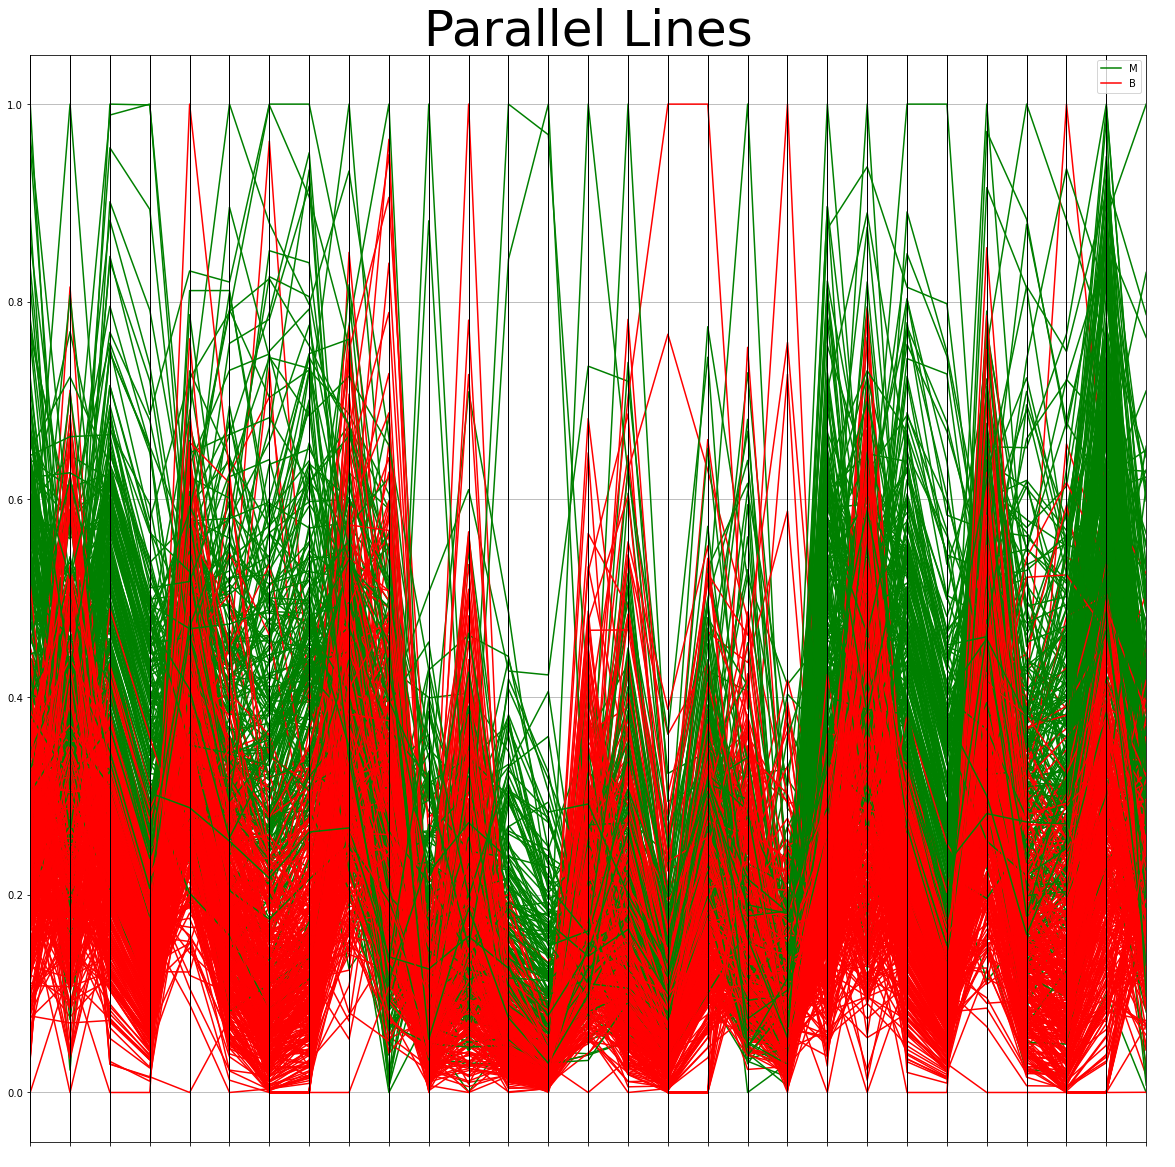

<Figure size 1440x1440 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
plt.rcParams['figure.figsize'] = [20, 20]
parallel_coordinates(normalized_features.iloc[:, 0:30], 'Label', color = ["Green", "Red"])
plt.title("Parallel Lines", fontsize = 50)
plt.xticks(color='w')
plt.savefig("parallel.png")
plt.figure(figsize=(20,20))
plt.show()